### Handwritten digit recognition using Neural network

#### Dataset used: mnist_handwritten_digits which has 28*28 pixel values for each digit image.

1. Neural network with 2 hidden layers. First hidden layers have 128 neurons while second layer have 64 neurons.
2. Activation function used is Sigmoid. For predicted output at the end, softmax is used.
3. Loss function used for backprop: mean square error. (usually this loss function is used for regression but I tried to implement classification with it. Replace it with cross entropy loss function if one wants.)
4. Learning rate:0.01


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1=np.loadtxt('mnist_small_train_in.txt',delimiter=',')
data1=data1.T
data3=np.loadtxt('mnist_small_test_in.txt',delimiter=',')
data3=data3.T

Train_in/Test_in dataset has pixel values of 28*28 dimension image (784 pixel values) of handwritten digits. While,Train_out/Test_out dataset has correct recognition of digit. 

In [6]:
print("Training dataset shape",data1.shape)
print("Test dataset shape",data3.shape)

Training dataset shape (784, 6006)
Test dataset shape (784, 1004)


In [8]:
data2=np.loadtxt('mnist_small_train_out.txt')
data4=np.loadtxt('mnist_small_test_out.txt')

In [9]:
print("Training out shape",data2.shape)
print("Test out shape",data4.shape)

Training out shape (6006,)
Test out shape (1004,)


In [ ]:
We need a neural network to correctly classify the images of 784 pixels to predict the digit. So, after each 
iteration we need to backpropagate to find loss occured. For this, we need to apply 'One hot encoding' to 
output digits in Train_out and Test_out dataset.

In [14]:
y=np.zeros((10,6006))
print('Without one hot encoded:',data2)
for i in range(0,6006):
    temp=int(data2[i])
    y[(temp,i)]=1
print('\nWith One hot encoded:\n',y)    

Without one hot encoded: [0. 0. 0. ... 9. 9. 9.]

With One hot encoded:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [16]:
print(y[:,0])        #This indicating the correct digit is 0. 

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Activation Functions:

In [20]:
def relu_derv(Z):
    return Z>0

In [21]:
def sigmoid_derv(z):
    s = 1. / (1. + np.exp(-z))
    return s*(1-s)

In [22]:
def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s

In [23]:
def softmax(Z):
    return np.exp(Z)/np.sum(np.exp(Z))

In [26]:
alpha=0.01                      #learning rate for updating weights and biases
w1=np.random.randn(128,784)     #Decalre architecture of weights and biases
b1=np.random.randn(128,1)
w2=np.random.randn(64,128)
b2=np.random.randn(64,1)
w3=np.random.randn(10,64)
b3=np.random.randn(10,1)

In [43]:
A0=data1[:,i]
print(w1.shape)
print(data1.shape)

(128, 784)
(784, 6006)


In [27]:
classification=[]
loss=[]
for i in range(500):            #epochs:500
    
    for i in range(6006):
        A0=np.reshape(data1[:,i],(784,1))
        Z1=np.dot(w1,A0)+b1
        A1=sigmoid(Z1)
        Z2=np.dot(w2,A1)+b2
        A2=sigmoid(Z2)
        Z3=np.dot(w3,A2)+b3
        A3=softmax(Z3)

        
        d=(0.5)*(A3-np.reshape(y[:,i],(10,1)))**2
        
        d1=np.sum(d)
        loss.append(d1)
        dz3=A3-np.reshape(y[:,i],(10,1))
        dw3=np.dot(dz3,A2.T)
        db3=dz3
        dz2=np.dot(w3.T,dz3)*sigmoid_derv(Z2)
        dw2=np.dot(dz2,A1.T)
        db2=dz2
        dz1=np.dot(w2.T,dz2)*sigmoid_derv(Z1)
        dw1=np.dot(dz1,A0.T)
        db1=dz1

        w3=w3-alpha*dw3
        w1=w1-alpha*dw1
        w2=w2-alpha*dw2

        b1=b1-alpha*db1
        b2=b2-alpha*db2
        b3=b3-alpha*db3

    right=0
    wrong=0
    for i in range(1004):
        A0=np.reshape(data3[:,i],(784,1))
        Z1=np.dot(w1,A0)+b1
        A1=sigmoid(Z1)
        Z2=np.dot(w2,A1)+b2
        A2=sigmoid(Z2)
        Z3=np.dot(w3,A2)+b3
        A3=softmax(Z3)
        A3=A3.tolist()
        detection=A3.index(max(A3))
        if data4[i]==detection:
            right=right+1
        else:
            wrong=wrong+1
    print(right)        #print right digits detected from test dataset which is notseen by neural network
    
    
    classification.append(right)

105
107
108
110
117
123
137
155
165
182
192
207
219
237
255
269
283
299
311
321
332
345
356
366
374
382
391
397
405
414
421
423
431
436
440
451
456
461
469
473
478
484
490
495
505
511
514
516
521
527
531
537
539
543
546
555
559
562
564
571
572
573
579
583
591
600
608
609
616
619
625
629
635
643
646
652
655
658
659
662
666
672
674
678
682
685
687
692
696
699
702
708
711
713
716
723
726
731
735
738
742
743
745
754
757
761
763
764
768
770
772
775
777
778
782
783
784
787
788
792
792
793
793
797
798
800
804
803
806
808
811
812
812
814
817
819
819
820
822
824
824
824
825
825
825
825
825
826
828
828
827
829
829
829
830
830
830
831
832
833
834
833
832
832
832
833
834
836
836
836
836
836
837
835
836
837
838
838
838
839
839
838
838
838
839
840
841
842
843
843
843
844
845
846
846
848
849
850
850
850
850
850
849
849
849
849
849
849
849
849
849
849
848
849
849
850
850
850
850
850
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851
851


In [28]:
rate=np.array(classification)/10.04       #total no. of digits=1004

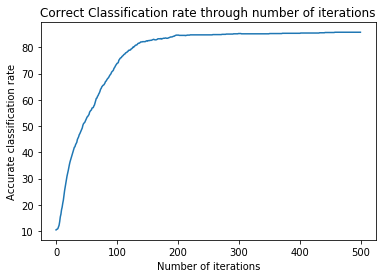

In [29]:
plt.plot(rate)
plt.ylabel("Accurate classification rate")
plt.xlabel("Number of iterations")
plt.title("Correct Classification rate through number of iterations")
plt.show()

In [30]:
rate[-1]                   

85.7569721115538

Conclusion: 
1. With 2 hidden layers and 500 epochs it achieved accuracy of 85.75 percent on unseen Test data.
2. Further possible improvements:
    Increase hidden layers and number of neurons in each hiden layer.
    Use Cross entropy as loss function for backpropagation.
    
